Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Evan"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.06063951100000009


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The main difference is that the version in this code randomizes the order of the elements in the array whereas the version in Cormen randomizes the partition element. 

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [3]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
def randomized_qsort():
    
    random.shuffle(lst)
    return qsort(lst)


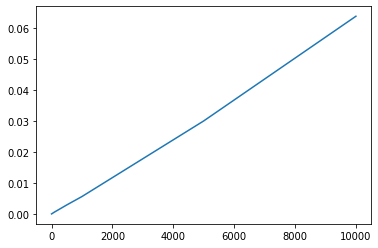

In [4]:
t_list = []
n_list = [1,5,10,50,100,500,1000,5000,10000]
for n in n_list:
    lst = [i for i in range(n)]
    total_time = 0
    for i in range(10):
        total_time += timeit.timeit(randomized_qsort,number=1)
    ave_time = total_time/10
    t_list.append(ave_time)
    
plt.plot(n_list,t_list)
plt.show()

#raise NotImplementedError()

In [5]:
lst = [i for i in range(10)]
print(timeit.timeit(randomized_qsort,number=1))

0.00010558699999974053


## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [6]:
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue
        isinlst = False
        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]  
        #print(inds,"inds")
        values = [lst[ind] for ind in inds]
        #print(values,"values")
        partition = median(*values)
        #print(partition,"partition")
        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #change to <=
        upper = []
        for a in lst[frm:to]:
            if a > partition:
                upper.append(a)
            elif a == partition:
                if isinlst == True:
                    upper.append(a)
                else:
                    isinlst = True
        
        #counts = sum([1 for a in lst[frm:to] if a == partition])
        #print(lower,upper,"lower,upper")
        ind1 = frm + len(lower)
        ind2 = ind1 + 1
        #print(ind1,ind2,"ind1,ind2")
        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] # * counts
        lst[ind2:to] = upper
        #print(lst,"lst")
        # Enqueue other locations
        #print("ewf",frm,ind1,ind2,to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    #print(lst)
    return lst    

    raise NotImplementedError()

In [7]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

In [8]:
lst = [i for i in range(5)]
qsort(lst)

[0, 1, 2, 3, 4]

In [9]:
a = [2,3,5]
a.remove(a[1])
a

[2, 5]

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

<function matplotlib.pyplot.show(*args, **kw)>

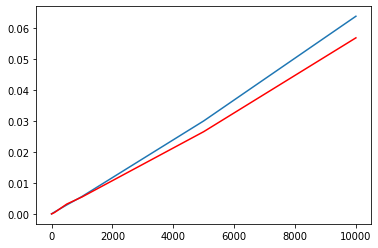

In [11]:
t2_list = []
n_list = [1,5,10,50,100,500,1000,5000,10000]
for n in n_list:
    lst = [i for i in range(n)]
    total_time = 0
    for i in range(10):
        total_time += timeit.timeit(randomized_qsort,number=1)
    ave_time = total_time/10
    t2_list.append(ave_time)
    
plt.plot(n_list,t_list)
plt.plot(n_list,t2_list,color='r')
plt.show

#raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [15]:
def qsort(lst):

    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        #values = [lst[ind] for ind in inds]
        partition = lst[0]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst
    raise NotImplementedError()

In [16]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

In [ ]:
lst = [i for i in range(5)]
qsort(lst)

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
t3_list = []
n_list = [1,5,10,50,100,500,1000,5000,10000]
for n in n_list:
    lst = [i for i in range(n)]
    total_time = 0
    for i in range(10):
        total_time += timeit.timeit(randomized_qsort,number=1)
    ave_time = total_time/10
    t3_list.append(ave_time)
    
plt.plot(n_list,t_list)
plt.plot(n_list,t2_list,color='r')
plt.plot(n_list,t3_list,color='g')

plt.show()
#raise NotImplementedError()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


We can assume that the most efficient recursive call will be with the best case scenario, that the sub-arrays are evenly divided. In that case we would have a binary tree with depth 500, which would have 1000 leaf nodes. As such, the list should be maximum length 1000 to recursively sort with quicksort in python. 